__Cuaderno de trabajo de:__ Nombre Apellido

In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np
import math 
import itertools

### Números pseudo-aleatorios

Cualquier lenguaje de programación tiene una función random, que cuando la llamamos nos devuelve un número pseudo-aleatorio entre 0 y 1. Todos los números entre 0 y 1 son *"igualmente probables"

In [2]:
random.random?

In [3]:
#Cada vez que ejecutamos este código obtenemos un número distinto:
random.random()

0.9332569115398632

In [4]:
#Generamos 10 números pseudo-aleatorios y los imprimimos
for i in range(10):
    print(random.random())

0.26896112557715735
0.039035049227878815
0.223454541171219
0.006882959080336759
0.22362956071495987
0.6556962038215306
0.7588353665112518
0.7334926925731236
0.13354079494174576
0.7488957633036537


Además, python nos ofrece otras funciones prácticas:

 - ``random.randint(a,b)`` devuelve un número entero entre a y b (inclusive). Todos los números entre a y b son *"igualmente probables"*.
 - ``random.choice(lista)`` devuelve un elemento de ``lista`` (que debe ser una lista, cadena de caracteres, conjunto...). Todos los elementos son *"igualmente probables"*.

In [5]:
for i in range(10):
    print (random.randint(10,20))

16
14
19
20
13
10
10
14
13
15


In [6]:
for i in range(10):
    
    print(random.choice([[1,3,2],[4,2]]))

[4, 2]
[1, 3, 2]
[4, 2]
[4, 2]
[4, 2]
[4, 2]
[4, 2]
[4, 2]
[4, 2]
[4, 2]


### Semilla aleatoria

Estos números parecen aleatorios, pero **el ordenador los obtiene aplicando reglas deterministas**. Sólo parecen aleatorios, pero *la cpu no lanza dados cuando llamamos a random*.

Esto no es un inconveniente en la práctica, porque son casi imposibles de distinguir de números auténticamente aleatorios.
De hecho, es una virtud, porque si fijamos la **semilla aleatoria**, podemos obtener exactmente los mismos números, aunque hagamos el cálculo en máquinas distintas varios años después.

In [7]:
#Si cambias la semilla, las elecciones cambian, pero con la misma semilla
#obtenemos los mismos resultados
random.seed(1)
for i in range(10):
    print (random.random())
for i in range(10):
    print (random.randint(10,20))
for i in range(10):
    print(random.choice('AEIOU'))
for i in range(10):
    print(random.choice(["hola","adiós","¿Qué tal?", "ahora vengo"]))

0.13436424411240122
0.8474337369372327
0.763774618976614
0.2550690257394217
0.49543508709194095
0.4494910647887381
0.651592972722763
0.7887233511355132
0.0938595867742349
0.02834747652200631
16
16
19
10
17
14
13
19
11
15
A
A
A
U
A
O
E
O
A
U
adiós
ahora vengo
ahora vengo
adiós
¿Qué tal?
adiós
adiós
ahora vengo
¿Qué tal?
hola


### Distribuciones de números aleatorios

El bloque de funciones de distribuciones ofrece numerosas funciones que permiten generar un array de números aleatorios a partir de distribuciones de todo tipo, vamos algunos ejemplos:

#### Distribución uniforme

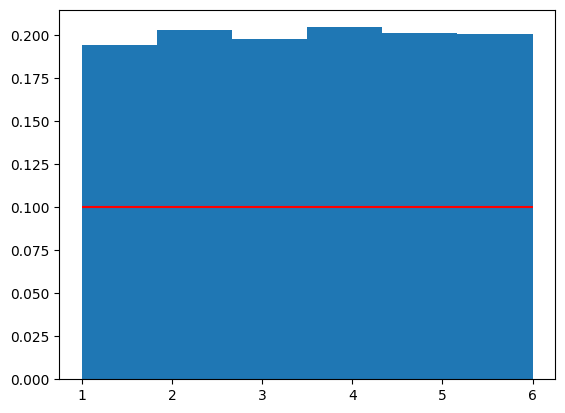

In [8]:
N_puntos = 10000
ini = 1
fin = 6
bins = 6

x = np.random.uniform(ini, fin, N_puntos)
plt.hist(x, bins,density=True)  #desity=True integra la curva a 1
plt.hlines(1/10, ini, fin, linestyles ="-", colors ="r")
plt.show() 

#### Distribución normal

Es una distribución gausiana
$$p(x) = \frac{1}{\sqrt{ 2 \pi \sigma^2 }} e^{ - \frac{ (x - \mu)^2 } {2 \sigma^2} }$$

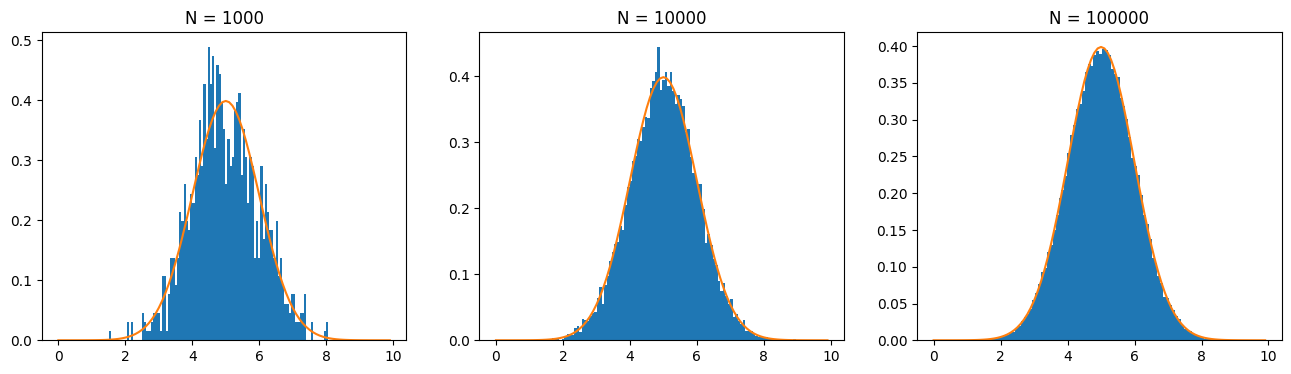

In [9]:
ini = 0
fin = 10
bins = 100
sigma = 1.0
mu = 5.0


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,4))

N_puntos = 1000
x = np.random.normal(mu, sigma, N_puntos)
ax1.hist(x, bins,density=True)
ax1.set_title("N = "+str(N_puntos))

N_puntos = 10000
x = np.random.normal(mu, sigma, N_puntos)
ax2.hist(x, bins,density=True)
ax2.set_title("N = "+str(N_puntos))

N_puntos = 100000
x = np.random.normal(mu, sigma, N_puntos)
ax3.hist(x, bins,density=True)
ax3.set_title("N = "+str(N_puntos))

x = np.arange(0, 10, 0.1)
y=[]
for i in range(len(x)):
    y.append(1/math.sqrt(2*math.pi*sigma**2)*math.exp(-((x[i]-mu)**2)/(2*sigma**2)))
ax1.plot(x,y)
ax2.plot(x,y)
ax3.plot(x,y)

plt.show() 

#### Distribución exponencial

Es una distribución exponencial
$$  f(x; \frac{1}{\beta}) = \frac{1}{\beta} \exp(-\frac{x}{\beta})  $$

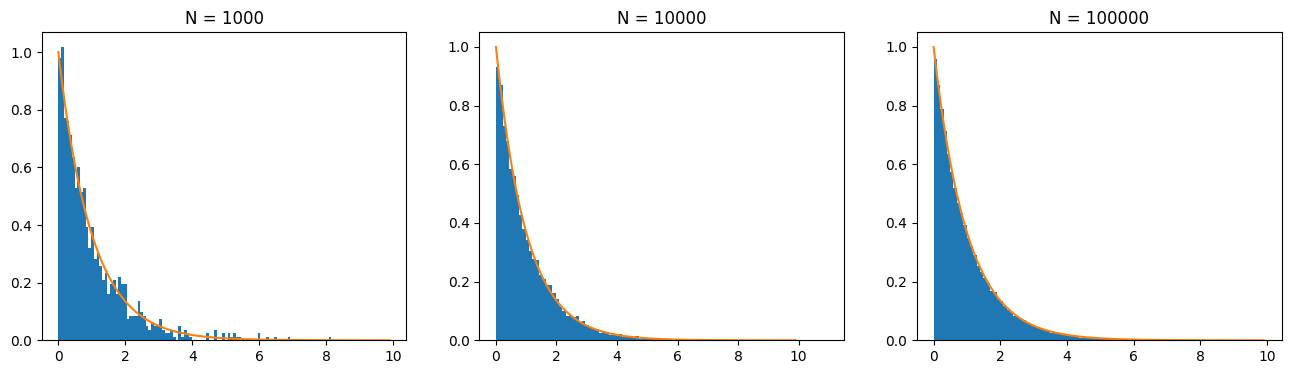

In [10]:
ini = 0
fin = 10
bins = 100
beta = 1.0

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,4))

N_puntos = 1000
x = np.random.exponential(beta, N_puntos)
ax1.hist(x, bins,density=True)
ax1.set_title("N = "+str(N_puntos))

N_puntos = 10000
x = np.random.exponential(beta, N_puntos)
ax2.hist(x, bins,density=True)
ax2.set_title("N = "+str(N_puntos))

N_puntos = 100000
x = np.random.exponential(beta, N_puntos)
ax3.hist(x, bins,density=True)
ax3.set_title("N = "+str(N_puntos))

x = np.arange(0, 10, 0.1)
y=[]
for i in range(len(x)):
    y.append(1/beta*math.exp(-x[i]/beta))
ax1.plot(x,y)
ax2.plot(x,y)
ax3.plot(x,y)

plt.show() 

<hr>
<b><font color='red'>Ejercicio 01</font></b> 

El método **Montecarlo** es un método no determinista o estadístico numérico, usado para aproximar expresiones matemáticas complejas y costosas de evaluar con exactitud. El método se llamó así en referencia al Casino de Montecarlo (Mónaco) por ser “la capital del juego de azar”, al ser la ruleta un generador simple de números aleatorios. El nombre y el desarrollo sistemático de los métodos de Montecarlo datan aproximadamente de 1944 testee combinaciones posibles.

Vamos a calcular el valor de $\pi$, para ello, si $X$ e $Y$ son dos variables aleatorias continuas uniformes en el intervalo (-1,1) y son independientes.  
$\pi$ Vendrá dada por la probabilidad de que $X^2 + Y^2  \leq 1$, es decir:  
$$\pi = \frac{4*\text{nº puntos que caén dentro}}{\text{nº total de intentos}}$$ 
Obten tambien una gráfica como la que se muestra a continuación.

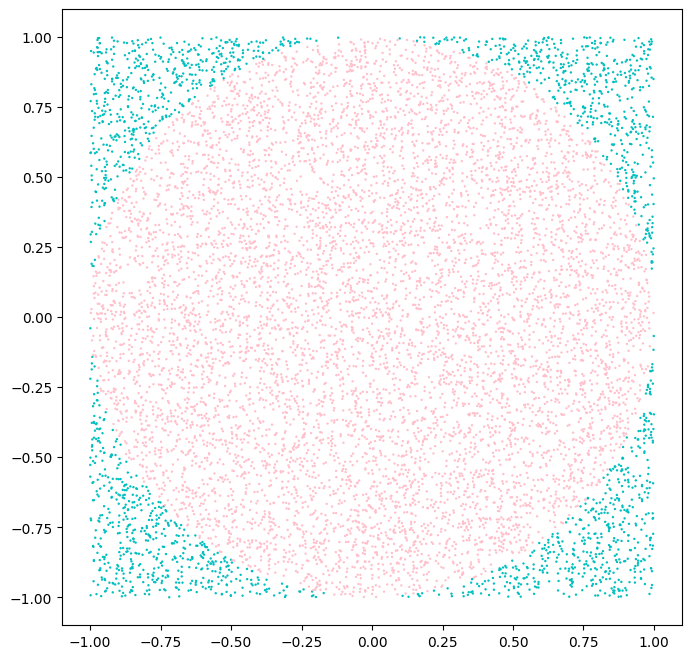

In [24]:
N=10000 #número de intentos
colores = []
x = []
y = []
for i in range(N):
    a = random.uniform(-1,1)
    b = random.uniform(-1,1)
    x.append(a)
    y.append(b)

    if a**2 + b**2 <= 1:
        colores.append('pink')
    else:
        colores.append('c')
    
plt.figure(figsize=(8,8))
plt.scatter(x,y, c=colores, s=0.5)
plt.show()

<img src="f6.png">  

<hr>
<b><font color='red'>Ejercicio 02</font></b> 

Crea un histograma en que se vea la distribución que saldría al sumar dos dados, tiene que verse una gráfica como la que se muestra a continuación

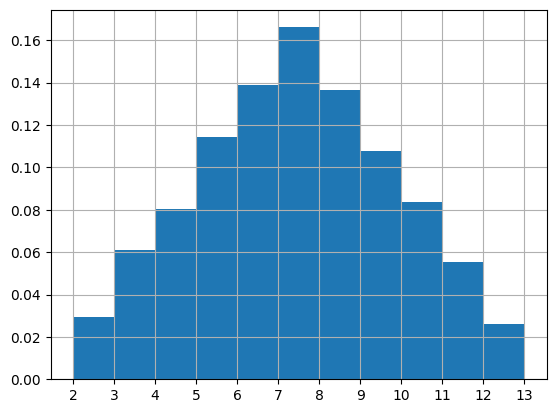

In [48]:
p=[]
inter=[2,3,4,5,6,7,8,9,10,11,12,13]
for i in range(N):
    p.append(random.randint(1,6)+random.randint(1,6))
plt.hist(p,bins=inter,density=True)
plt.grid()
plt.xticks(inter)
plt.show()

<img src="f7.png">  

<hr>
<b><font color='red'>Ejercicio 03</font></b> 

Al implementar MD5, obtendremos como resultado, una cadena alfanumérica de 32 caracteres hexadecimales. Ocupando siempre 16 Bytes de memoria. 

El siguiente pin = '4aca32b706287f13903f08b7aab38f79', ha sido codificado con md5 "hashlib.md5(b'****')", para ello han utilizado dos carácteres en mayúsculas ('ABCDEF')  y dos números (0-9) , haz una función que obtenga el pin descodificado utilizando random.

¿Cuántos intentos ha relizado hasta que la ha descubierto?
Realiza el ejercicio varias veces y haz un histograma.



In [13]:
"""Esribe tu código aquí"""

'Esribe tu código aquí'

<hr>
<b><font color='red'>Ejercicio 04</font></b>  

<img src="ruleta.png"> 

La ruleta europea tiene 37 números, de los cuales 18 son rojos, 18 negros y el 0, que es verde, entre las diversas apuestas existe la de de apostar todo a rojos o negros, en este caso si se gana, se ganaría lo mismo que se ha apostado.

Haz la siguiente simulación, empezando con una cantidad de 1000 euros, apostando de forma constante 50 Euros, haz que la maquina apueste siempre a los pares o a los impares, en ambos casos si sale 0 se perderia lo apostado.


<hr>
<b><font color='red'>Ejercicio 05</font></b>  

Utiliza 10 jugadores y haz el promedio de veces en lo que tardarían en arruinarse

<hr>
<b><font color='red'>Ejercicio 06</font></b>  

Obten la siguiente evolución respecto el número de jugadores:

    print("%6d" % njugadores,"%.1f" % a.mean(),"%.0f"%a.std())
        10 636.8 624
        20 603.0 799
        50 799.2 875
       100 558.1 500
       200 921.6 1236
       500 744.2 936
      1000 726.1 1021
      5000 734.3 967
     10000 734.5 1021


<hr>
<b><font color='red'>Ejercicio 07</font></b>  

Empezamos con el problema del viajante, (Travelling Salesman Problem) responde a la siguiente pregunta: dada una lista de ciudades y las distancias entre cada par de ellas, ¿cuál es la ruta más corta posible que visita cada ciudad exactamente una vez y al finalizar regresa a la ciudad origen? Este es un problema NP-Hard dentro en la optimización combinatoria, muy importante en investigación operativa y en ciencias de la computación. 
En el siguiente problema partiendo de Madrid tenemos que pasar por las siguientes ciudades

In [14]:
from ipyleaflet import Map, Polyline
from ipyleaflet import Map, basemaps, basemap_to_tiles, Circle


ciudad = [[40.4950873744,-3.71704619215],
[41.6207742504,-2.58874304739],
[38.4786378049,-0.568699068376],
[42.0439686698,1.04798206104],
[36.5538729195,-5.7604183752],
[40.8049892162,-6.06541224773],
[42.435764706,-8.46106294738],
[38.0165122783,-3.44169215171],
[41.6203648019,-1.06449678144],
[42.1280117119,2.6735559327],
[43.292357861,-5.99350932547]]
 
line = Polyline(
    locations=ciudad,
    color="blue" ,
    weight = 2,
    fill=False
)
c=ciudad[0]
m = Map(center = ciudad[0], zoom =5.4)
for i in ciudad:
    circle = Circle()
    circle.location = i
    circle.radius = 5000
    circle.color = "blue"
    circle.fill_color = "blue"
    m.add_layer(circle)
m.add_layer(line)
m

Map(center=[40.4950873744, -3.71704619215], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_i…

Crea una función que obtenga el recorrido realizado, testeala con el orden actual de ciudades 

    sol : d = 435.6697061255633

In [15]:
"""Esribe tu código aquí"""

'Esribe tu código aquí'

Haz un algoritmo que utilice el **método montecarlo**, para este problema haz que desde desde la ciudad[0] se minimice la distancia recorrida, utilizalo con almenos 1000000 permutaciones aleatorias para mejorar el recorrido.

In [16]:
"""Esribe tu código aquí"""

'Esribe tu código aquí'

Utiliza itertools para generar todas las permutaciones y obtener la solución

<img src="permutations_ciudades.png">  

In [17]:
"""Esribe tu código aquí"""
#sol d = 434.64381367718534

'Esribe tu código aquí'